# Image Processing 



The **digits dataset** from Scikit-learn consists of 1,797 images of handwritten digits (0-9), each represented as an 8x8 grid of pixel values. These images have been preprocessed and flattened into 64-dimensional feature vectors, where each value represents the intensity of a pixel (ranging from 0 to 16).

The goal of this analysis is to explore the relationship between pixel intensity patterns and the digit classes (0-9). By the end of this analysis, I aim to build an accurate classifier that can effectively recognize handwritten digits.

In [65]:
# Import Libraries
import numpy as np
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
%matplotlib inline


In [66]:
# Load the Digits Dataset
try:
    digits = load_digits()
    if digits is None or not hasattr(digits, 'data') or not hasattr(digits, 'target'):
        raise ValueError("The dataset was not loaded properly. Check the source or dataset integrity.")
    else:
        print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")


Dataset loaded successfully!


## Data Cleaning, Preprocessing and EDA

In [67]:
# Display the available keys in the digits dataset
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [68]:
# Display the first data point from the digits dataset
digits.data[:1]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [69]:
# Display the first 20 target points from the digits dataset
digits.target[:20]


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

For this analysis, I will primarily focus on:

- data: Input features (flattened pixel values).
- target: Labels (digit classes).

In [70]:
# Print the shape of the image data and label data to understand the structure
print("Image Data Shape:", digits.data.shape)

print("Label Data Shape:", digits.target.shape)


Image Data Shape: (1797, 64)
Label Data Shape: (1797,)


In [71]:
# Check if there are any missing values in the data
print("Any missing values in data:", np.isnan(digits.data).any())

# Check if there are any missing values in the target labels
print("Any missing values in target:", np.isnan(digits.target).any())


Any missing values in data: False
Any missing values in target: False


In [72]:
# Display the pixel array for the first digit image (8x8 pixel grid)
digits.images[0]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

Class counts: [178 182 177 183 181 182 181 179 174 180]


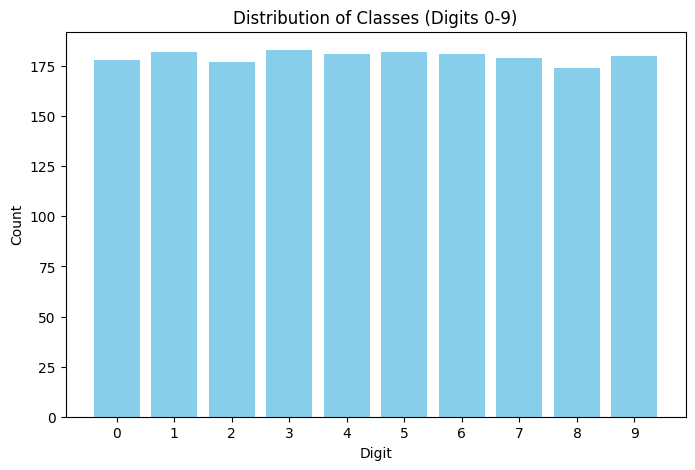

In [73]:
# Get the target values (digit labels)
labels = digits.target

# Count the number of occurrences of each class (digit)
class_counts = np.bincount(labels)

# Plot the class distribution of digits (0-9)
plt.figure(figsize=(8, 5))
plt.bar(range(10), class_counts, color='skyblue')
plt.title('Distribution of Classes (Digits 0-9)')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.xticks(range(10))

# Print the counts for each class to verify that the dataset is balanced
print("Class counts:", class_counts)


In [74]:
# Check the minimum and maximum pixel values in the dataset to confirm normalization
min_pixel_value = digits.data.min()
max_pixel_value = digits.data.max()

# Print the range of pixel values
print(f"Minimum pixel value: {min_pixel_value}")
print(f"Maximum pixel value: {max_pixel_value}")


Minimum pixel value: 0.0
Maximum pixel value: 16.0


### Data Cleaning, Preprocessing, and EDA Summary

- The **`digits` dataset** from Scikit-learn is already **well-preprocessed**, with no need for explicit cleaning steps.
  
- **No missing values** were detected in the dataset. Both the image data and target labels are complete, confirming the dataset’s integrity.

- The dataset is composed of **8x8 pixel images**, where each image is represented as a 64-dimensional feature vector. This structure is consistent across all samples, and no reshaping is required.

- The dataset is **balanced** across all digit classes (0-9), as confirmed by the class distribution plot. Each class has a roughly equal number of samples, reducing the need for any class balancing techniques such as oversampling or undersampling.

- The pixel values are already **normalized between 0 and 16**, which simplifies preprocessing. No further scaling or normalization is necessary for models like **Random Forest** that are less sensitive to feature scaling.

- The **visualizations of class distributions** indicate that the dataset is well-suited for classification tasks without needing additional preprocessing for balance or missing values.

- This dataset is ideal for straightforward analysis and modeling. However, in more complex or real-world datasets, additional data cleaning might be necessary if the data is **unstructured**, contains **missing values**, or suffers from **class imbalance**.

## Examples of some of the actual images from the dataset:

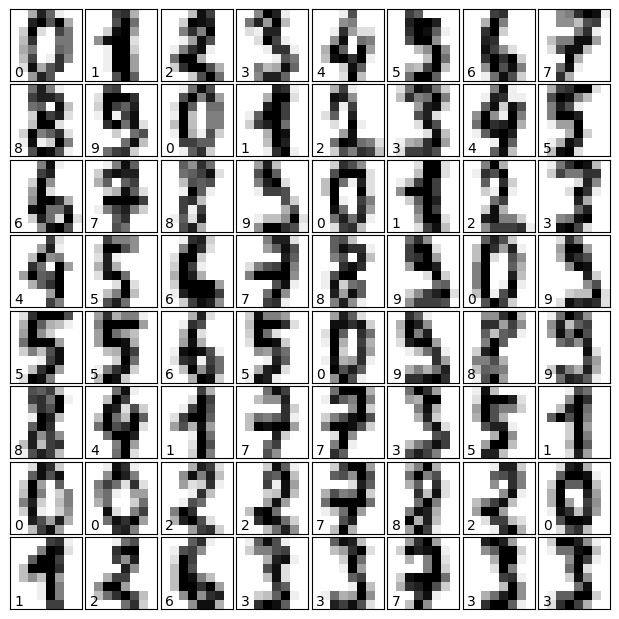

In [75]:
# Set up the figure for displaying the first 64 digit images (8x8 pixels)
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# Plot the first 64 digit images
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
    
    # Label each image with its corresponding target value (digit)
    ax.text(0, 7, str(digits.target[i]))


This visualization shows the first 64 handwritten digits from the dataset, each as an **8x8 pixel image**. The digits look **blurry** and **pixelated** due to the low resolution, making it harder to clearly distinguish some numbers. This highlights the challenge the model faces in recognizing digits that vary in style and clarity.

## Random Forest

In [76]:
# Set the features (X) and target labels (y) from the digits dataset
X = digits.data
y = digits.target

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Purpose of Training and Testing Sets

The dataset is split into training and testing sets to evaluate the model's ability to generalize to unseen data. The training set is used to train the model, while the test set is reserved for evaluation. By using a separate test set, it can ensure that the model's performance is assessed on data it hasn't encountered during training, providing a more accurate estimate of how well it will perform on new, real-world data.

In [77]:
# Initialize a Random Forest Classifier with a fixed random_state for reproducibility
clf = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Confusion Matrix:


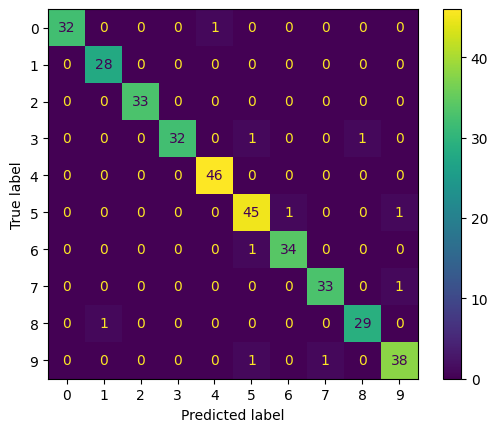

In [78]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print additional evaluation metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix for the predictions
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)


**Assumptions:**

- The **classification report** shows that the model has an overall accuracy of **97%**, with a strong performance across most digit classes.
- The **macro average** precision, recall, and f1-score of **0.97** indicate that the model performs consistently across all classes, with no major bias toward any particular class.
- **Confusion matrix** highlights:
  - **Misclassifications**:
    - Class **3**: 2 instances misclassified as classes 5 and 8.
    - Class **5**: 1 instance misclassified as class 6 and 9.
    - Class **9**: 1 instance misclassified as class 5 and 7.
- The model struggles the most with classes **3**, **5**, and **9**.
- The model had had slightly lower scores for class 5 and 9.

The model likely struggled with **3**, **5**, and **9** due to their **visual similarity** (curves and shapes can overlap), making it harder for the classifier to differentiate between them, especially in ambiguous or unclear examples from the dataset.

In [79]:
# Display the parameters of the trained Random Forest model
pprint(clf.get_params(), indent=4)


{   'bootstrap': True,
    'ccp_alpha': 0.0,
    'class_weight': None,
    'criterion': 'gini',
    'max_depth': None,
    'max_features': 'sqrt',
    'max_leaf_nodes': None,
    'max_samples': None,
    'min_impurity_decrease': 0.0,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'min_weight_fraction_leaf': 0.0,
    'monotonic_cst': None,
    'n_estimators': 100,
    'n_jobs': None,
    'oob_score': False,
    'random_state': 42,
    'verbose': 0,
    'warm_start': False}


### Parameter Tuning Choice:

Initially, I chose to tune **`n_estimators`** because it controls the number of trees in the Random Forest, with more trees generally improving model stability by reducing variance. 

After performing grid search with values like 50, 100, and 200, I found that the optimal value for **`n_estimators`** was **100**, which is also the default in Scikit-learn.

Since tuning this parameter did not result in a significant improvement over the default, I decided to focus on tuning **`max_depth`** instead, as this parameter allows more flexibility in controlling the complexity of each tree and did not simply resort to the default values.

Best Params: {'max_depth': 10}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.93      1.00      0.97        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.98      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.93      0.95        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


Confusion Matrix:


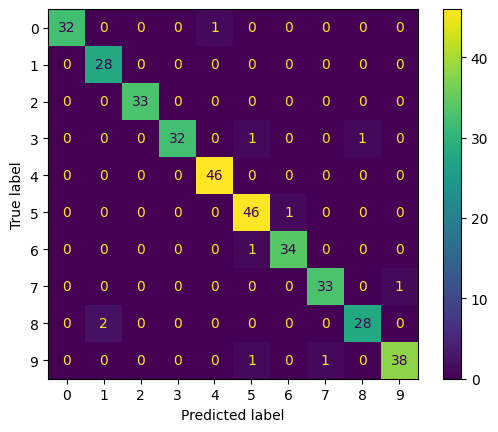

In [80]:
# Define a parameter grid including max_depth
param_grid = {
    'max_depth': [None, 10, 20, 30, 50]
}

# Ensure the GridSearchCV also uses random_state to ensure reproducibility
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best Params:", grid_search.best_params_)

# Train the model with best parameter
best_model = grid_search.best_estimator_

# Make predictions on the test set with best parameter
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test set
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix for the best model
print("\nConfusion Matrix:")
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test)
plt.show()


**Assumptions:**

- The **classification report** shows an overall accuracy of **97%**, with macro averages for precision, recall, and f1-score all at **0.97**, indicating consistent model performance across all classes.
- **Misclassifications** from the **confusion matrix** include:
  - Class **3**: 2 instances misclassified as class 5 and 8.
  - Class **8**: 2 instances misclassified as class 1.
  - Class **9**: 2 instances misclassified as class 5 and 7.
  
- The model struggles the most with **class 3**, **class 8**, and **class 9**, based on multiple misclassifications.
  
**Comparison of Untuned vs Tuned Models:**
- The **tuned model** with `max_depth=10` improved slightly scored for class 5 and 9 on but did slightly worse on class 1 and 8.

The value `{'max_depth': 10}` is chosen by `grid_search.best_estimator_` because it represents the hyperparameter configuration that produced the best performance on the validation set during the grid search. The grid search tests different values for `max_depth` and selects the one that optimizes the model's performance (typically measured by a scoring metric like accuracy). Therefore, the model with `max_depth=10` will be used for testing on the test data as it is expected to yield the best results based on previous evaluations.

### Conclusion:
The tuning process (specifically adjusting `max_depth`) **did not significantly improve** the model's performance. Both models performed well, and the tuning did not result in any noticeable improvements in terms of accuracy or macro average. Therefore, the original model was already highly effective, and the tuning maintained similar results without a major boost in performance.

### References:

https://stackoverflow.com/questions/12473511/what-does-matplotlib-imshowinterpolation-nearest-do

https://github.com/ageron/handson-ml/issues/575

https://www.statology.org/fig-add-subplot/

https://www.geeksforgeeks.org/matplotlib-pyplot-imshow-in-python/

https://www.geeksforgeeks.org/matplotlib-pyplot-subplots_adjust-in-python/

https://www.geeksforgeeks.org/numpy-bincount-python/

https://www.geeksforgeeks.org/numpy-isnan-python/

https://www.w3schools.com/python/ref_func_hasattr.asp


https://www.geeksforgeeks.org/pprint-data-pretty-printer-python/

https://www.quora.com/Should-all-features-be-standardized-or-scaled-before-creating-a-decision-tree-or-random-forest-model-If-so-what-is-the-reason-for-this#:~:text=Random%20forests%2C%20or%20any%20ensemble,%2C%20don't%20require%20scaling.

https://scikit-learn.org/1.3/tutorial/basic/tutorial.html

https://www.metriccoders.com/post/machine-learning-using-random-forest-classifier


https://www.kaggle.com/code/gauravduttakiit/digit-recognizer-using-random-forest

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html


https://medium.com/@kirtikajoshi2426/recognizing-handwritten-digits-with-scikit-learn-4fcca5993e15

https://github.com/thetti27/Random-Forest-Digits/blob/main/Random-Forest-Digits.ipynb


https://www.kaggle.com/code/rajnikant2020/random-forest-load-digit-datset-from-sklearn


